# Data Loading and Preprocessing

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("https://gitlab.crio.do/me_notebook/me_jupyter_bankattritionanalysis/-/raw/master/bank_dataset_v2.csv",header=0,skiprows=[1])

# Display the first few rows
print(df.head())

   Row Number Customer ID First Name        State  Gender  Age    Salary  \
0           2     MH00002      Nitya  Maharashtra  Female   77   33000.0   
1           3     KA00003     Vivaan    Karnataka    Male   78  190000.0   
2           4     MH00004     Dinesh  Maharashtra    Male   42  330000.0   
3           5     KA00005     Charvi    Karnataka  Female   29  155000.0   
4           6     DL00006      Aditi        Delhi  Female   38  111000.0   

   Credit Score  Tenure    Balance  ...  HasLoan HasFD  Num Of Products  \
0           538       4       0.00  ...        0     0                1   
1           531       8   15585.55  ...        0     1                2   
2           718       3  155688.22  ...        0     1                2   
3           710       7   89415.53  ...        0     1                2   
4           729       2   36613.80  ...        1     0                2   

   IsActiveMember  Exited  Complain  Count of Complains  Satisfaction Score  \
0            

In [2]:
# Print the column names of the dataset.
print(df.columns)

Index(['Row Number', 'Customer ID', 'First Name', 'State', 'Gender', 'Age',
       'Salary', 'Credit Score', 'Tenure', 'Balance', 'HasCrCard', 'Card Type',
       'HasLoan', 'HasFD', 'Num Of Products', 'IsActiveMember', 'Exited',
       'Complain', 'Count of Complains', 'Satisfaction Score', 'Point Earned',
       'Preferred Channel'],
      dtype='object')


In [3]:
# Standardize the column names: convert to lowercase and replace spaces with underscores.

# Replacing all spaces with underscore(_) and converting the entire string to lowercase

df.columns = df.columns.str.lower().str.replace(" ", "_")

# Showing the column headers again
df.columns

Index(['row_number', 'customer_id', 'first_name', 'state', 'gender', 'age',
       'salary', 'credit_score', 'tenure', 'balance', 'hascrcard', 'card_type',
       'hasloan', 'hasfd', 'num_of_products', 'isactivemember', 'exited',
       'complain', 'count_of_complains', 'satisfaction_score', 'point_earned',
       'preferred_channel'],
      dtype='object')

## Handle Missing Values

In [4]:
# Check for missing values
print(df.isnull().sum())

# What it does:
# df.isnull() → Returns a DataFrame of the same shape as df, with True where a value is missing (NaN) and False otherwise.
# .sum() → Counts the number of True values (i.e., missing values) in each column.
# print(...) → Displays the result.

row_number            0
customer_id           0
first_name            0
state                 0
gender                6
age                   0
salary                9
credit_score          0
tenure                0
balance               8
hascrcard             0
card_type             5
hasloan               0
hasfd                 0
num_of_products       0
isactivemember        0
exited                0
complain              0
count_of_complains    0
satisfaction_score    9
point_earned          0
preferred_channel     0
dtype: int64


In [5]:
# Impute missing 'salary' values with median
df['salary'].fillna(df['salary'].median(), inplace=True)

# Breaking it Down:
# df['Salary'] → Selects the "Salary" column from the DataFrame.
# .fillna(df['Salary'].median(), inplace=True) → Replaces all NaN (missing) values in the "Salary" column with the median of the column.
# df['Salary'].median() → Calculates the median salary (the middle value when sorted).
# fillna(value, inplace=True):
# value: The value used to replace NaNs (here, it's the median salary).
# inplace=True: Updates the DataFrame directly instead of returning a new one.

# Impute missing 'balance' values with 0
df['balance'].fillna(0, inplace=True)

# Impute missing 'satisfaction_score' with median
df['satisfaction_score'].fillna(df['satisfaction_score'].median(), inplace=True)

# Drop rows where 'gender' is missing
df = df.dropna(subset=['gender'])

# Fill missing 'card_type' with the most frequent value (mode)
df['card_type'].fillna(df['card_type'].mode()[0], inplace=True)


/tmp/ipython-input-280221031.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['salary'].fillna(df['salary'].median(), inplace=True)
/tmp/ipython-input-280221031.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [6]:
# Print the count of missing values in each column
print(df.isnull().sum())  # Count of NaN values

row_number            0
customer_id           0
first_name            0
state                 0
gender                0
age                   0
salary                0
credit_score          0
tenure                0
balance               0
hascrcard             0
card_type             0
hasloan               0
hasfd                 0
num_of_products       0
isactivemember        0
exited                0
complain              0
count_of_complains    0
satisfaction_score    0
point_earned          0
preferred_channel     0
dtype: int64


In [7]:
#  Convert 'card_type' to uppercase and Strip whitespace from 'card_type'
df["card_type"] = df["card_type"].str.upper().str.strip()
df['card_type'].unique()

array(['SILVER', 'GOLD', 'PLATINUM', 'NOT APPLICABLE'], dtype=object)

# Explore Numeric Columns

In [8]:
# Identify all numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
print(numeric_columns)

['row_number', 'age', 'salary', 'credit_score', 'tenure', 'balance', 'hascrcard', 'hasloan', 'hasfd', 'num_of_products', 'isactivemember', 'exited', 'complain', 'count_of_complains', 'satisfaction_score', 'point_earned']


In [9]:
# Count unique values in each numeric column
 # Step 1: Get the count of unique values for each numeric column
unique_counts = {col: df[col].nunique() for col in numeric_columns}

# Step 2: Print or use the unique counts
print(unique_counts)

{'row_number': 14993, 'age': 56, 'salary': 194, 'credit_score': 435, 'tenure': 10, 'balance': 12660, 'hascrcard': 2, 'hasloan': 2, 'hasfd': 2, 'num_of_products': 4, 'isactivemember': 2, 'exited': 2, 'complain': 2, 'count_of_complains': 31, 'satisfaction_score': 10, 'point_earned': 74}


# Outlier Detection and Treatment

In [10]:
import matplotlib.pyplot as plt

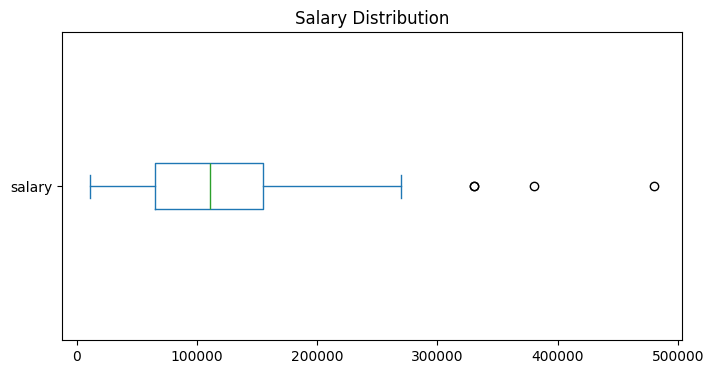

In [11]:
# Plot boxplot for 'salary'
# Chart title: Salary Distribution
# Plot Salary distribution
plt.figure(figsize=(8, 4))
df["salary"].plot(kind="box", vert=False)
plt.title("Salary Distribution")
plt.show()

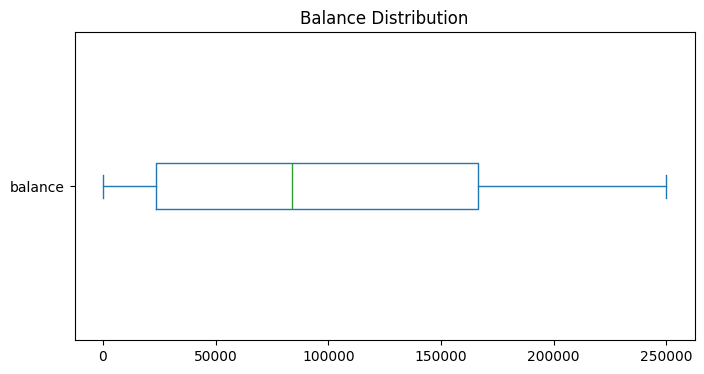

In [12]:
# Plot boxplot for 'balance'
# Chart title: Balance Distribution
plt.figure(figsize=(8, 4))
df["balance"].plot(kind="box", vert=False)
plt.title("Balance Distribution")
plt.show()

In [13]:
# Identify and count outliers in salary using IQR method
 #  Calculate IQR for Salary
Q1 = df["salary"].quantile(0.25)
Q3 = df["salary"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Identify outliers
salary_outliers = df[(df["salary"] < lower_bound) | (df["salary"] > upper_bound)]

print("Outlier Customers Based on Salary:")
print(salary_outliers[["salary"]])

outlier_count = ((df["salary"] < lower_bound) | (df["salary"] > upper_bound)).sum()
print("Count of Outlier Customers Based on Salary:", outlier_count)

Outlier Customers Based on Salary:
      salary
2   330000.0
36  480000.0
46  330000.0
59  380000.0
Count of Outlier Customers Based on Salary: 4


In [14]:
# Cap salary outliers at the upper bound
import numpy as np
df["salary"] = np.where(df["salary"] > upper_bound, upper_bound, df["salary"])

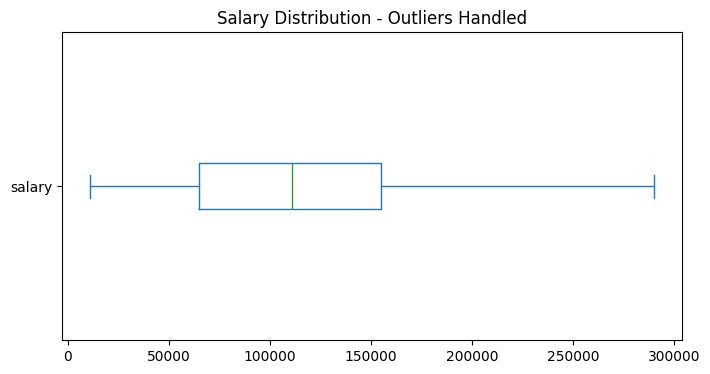

In [15]:

# Plot Salary distribution after handling outiers
# Chart title: Salary Distribution - Outliers Handled

# Plot Salary distribution
plt.figure(figsize=(8, 4))
df["salary"].plot(kind="box", vert=False)
plt.title("Salary Distribution - Outliers Handled")
plt.show()


# Exploratory Data Analysis

In [16]:
# Calculate Basic Summary Statistics
# Compute the mean and median for key numeric columns: Salary , Balance and Credit Score
# Print the results for interpretation.


mean_salary = round(df["salary"].mean())
median_salary = round(df["salary"].median())

mean_balance = round(df["balance"].mean())
median_balance = round(df["balance"].median())

mean_credit_score = round(df["credit_score"].mean())
median_credit_score = round(df["credit_score"].median())

# Display results
print(f"Mean Salary: {mean_salary}, Median Salary: {median_salary}")
print(f"Mean Balance: {mean_balance}, Median Balance: {median_balance}")
print(f"Mean Credit Score: {mean_credit_score}, Median Credit Score: {median_credit_score}")

Mean Salary: 110152, Median Salary: 111000
Mean Balance: 96958, Median Balance: 84081
Mean Credit Score: 670, Median Credit Score: 683


In [17]:
# Understand Categorical Variables
# Count and display how many customers fall into each category of: Gender, Card Type, HasLoan, HasFD

# Count of each category
gender_count = df["gender"].value_counts()
card_type_count = df["card_type"].value_counts()
loan_status_count = df["hasloan"].value_counts()
fd_status_count = df["hasfd"].value_counts()

# Display results
print("Gender Distribution:\n", gender_count)
print("\nCard Type Distribution:\n", card_type_count)
print("\nLoan Status Distribution:\n", loan_status_count)
print("\nFixed Deposit Status Distribution:\n", fd_status_count)

Gender Distribution:
 gender
Male      9028
Female    5965
Name: count, dtype: int64

Card Type Distribution:
 card_type
SILVER            4366
GOLD              4033
PLATINUM          3398
NOT APPLICABLE    3196
Name: count, dtype: int64

Loan Status Distribution:
 hasloan
0    11520
1     3473
Name: count, dtype: int64

Fixed Deposit Status Distribution:
 hasfd
0    8355
1    6638
Name: count, dtype: int64


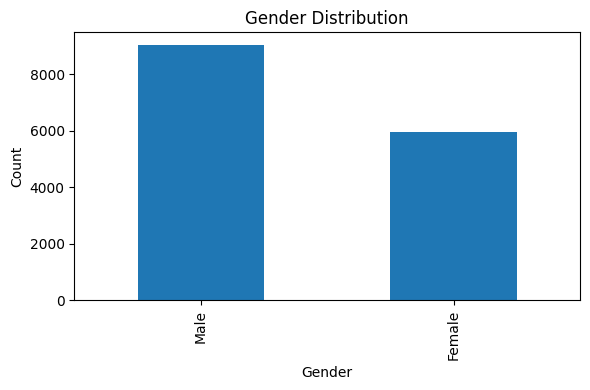

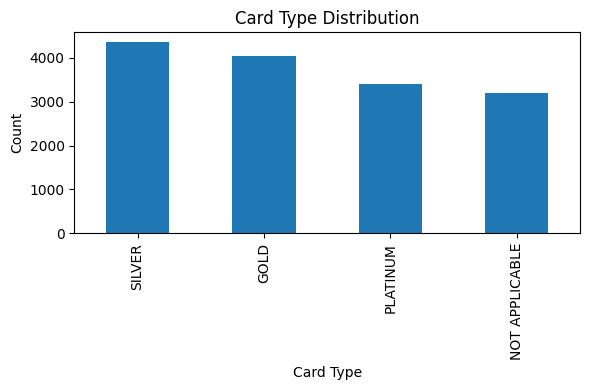

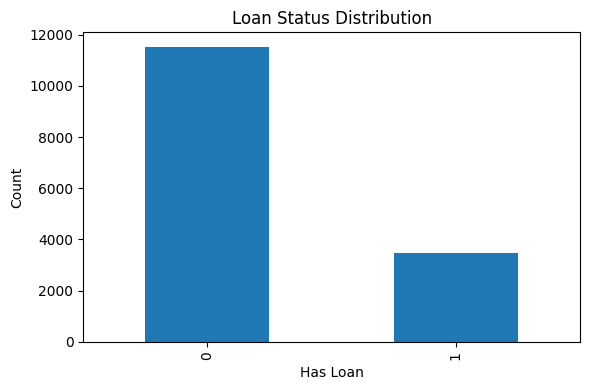

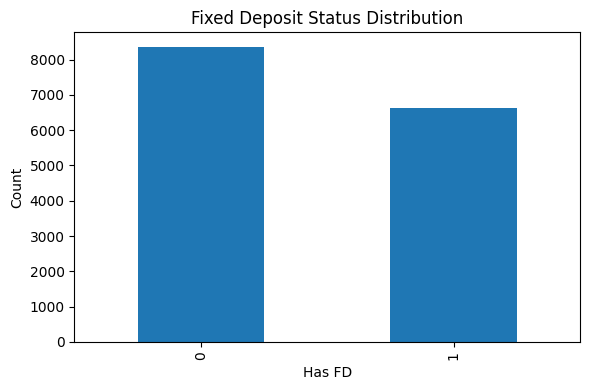

In [18]:
# PLot the above count distribution --> Optional
import matplotlib.pyplot as plt

# Plot gender distribution
plt.figure(figsize=(6, 4))
gender_count.plot(kind='bar')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Plot card type distribution
plt.figure(figsize=(6, 4))
card_type_count.plot(kind='bar')
plt.title("Card Type Distribution")
plt.xlabel("Card Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Plot loan status distribution
plt.figure(figsize=(6, 4))
loan_status_count.plot(kind='bar')
plt.title("Loan Status Distribution")
plt.xlabel("Has Loan")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Plot fixed deposit status distribution
plt.figure(figsize=(6, 4))
fd_status_count.plot(kind='bar')
plt.title("Fixed Deposit Status Distribution")
plt.xlabel("Has FD")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

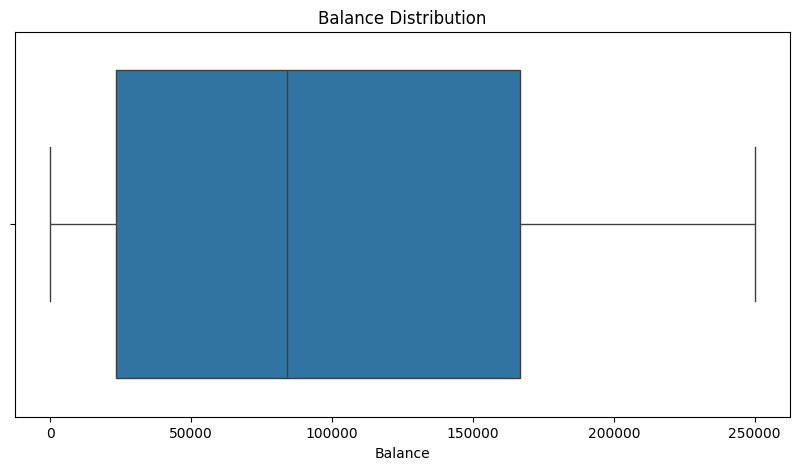

In [19]:
# Create a boxplot for the Balance column to detect outliers and understand spread.

import matplotlib.pyplot as plt
import seaborn as sns

# Balance using boxplots
plt.figure(figsize=(10,5))
sns.boxplot(x=df["balance"])
plt.title("Balance Distribution")
plt.xlabel("Balance")
plt.show()


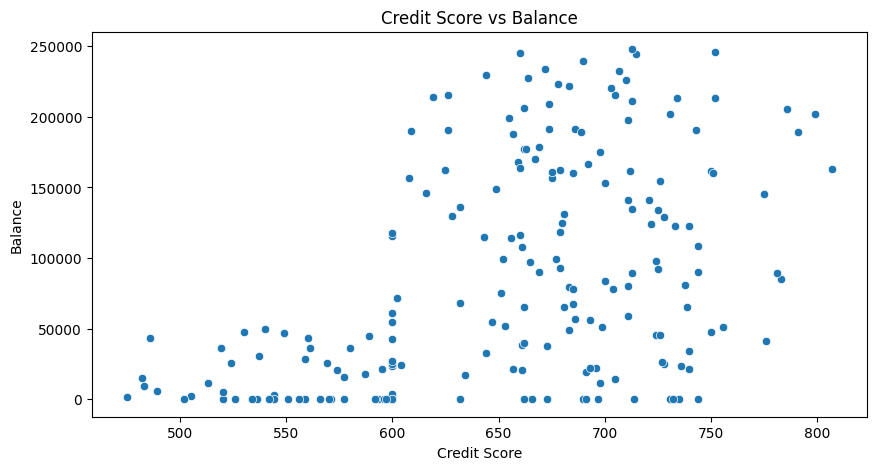

In [20]:
# Select a random sample of 200 customers from the dataset.
# Plot scatter plots to explore how two numeric variables relate to each other, plot for Credit Score vs Balance


# Subset of data (random sampling) around 200 datapoints are taken here
df_sample = df.sample(n=200, random_state=42)

# Scatter plot to detect anomalies in Credit Score vs Balance
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_sample["credit_score"], y=df_sample["balance"])
plt.title("Credit Score vs Balance")
plt.xlabel("Credit Score")
plt.ylabel("Balance")
plt.show()

## Feature Engineering

In [21]:
# Add the following new columns to the dataset:
# Debt-to-Income Ratio
#  Formula: (Balance + (HasLoan × Salary × 0.3)) / Salary

# 1. Financial Stability Indicator
df["Debt-to-Income Ratio"] = (df["balance"] + (df["hasloan"] * df["salary"] * 0.3)) / df["salary"]

print(df[["first_name", "Debt-to-Income Ratio"]].tail())

      first_name  Debt-to-Income Ratio
14994    Anirudh              1.267763
14995     Sanjay              0.233106
14996     Kavita              0.526083
14997    Anirudh              0.695548
14998      Arjun              1.446423


In [22]:
# Create new column calculating Loyalty Score
# Formula: (Tenure × Satisfaction Score) / (1 + Count of Complains)

df["Loyalty Score"] = (df["tenure"] * df["satisfaction_score"]) / (1 + df["count_of_complains"])

# Display dataset with new features
print(df.head())

   row_number customer_id first_name        state  gender  age    salary  \
0           2     MH00002      Nitya  Maharashtra  Female   77   33000.0   
1           3     KA00003     Vivaan    Karnataka    Male   78  190000.0   
2           4     MH00004     Dinesh  Maharashtra    Male   42  290000.0   
3           5     KA00005     Charvi    Karnataka  Female   29  155000.0   
4           6     DL00006      Aditi        Delhi  Female   38  111000.0   

   credit_score  tenure    balance  ...  num_of_products isactivemember  \
0           538       4       0.00  ...                1              0   
1           531       8   15585.55  ...                2              1   
2           718       3  155688.22  ...                2              1   
3           710       7   89415.53  ...                2              1   
4           729       2   36613.80  ...                2              1   

   exited  complain  count_of_complains  satisfaction_score  point_earned  \
0       1      

# Analyze Complaints by State

In [23]:
# Compute the average number of complaints per state using groupby() and transform().

df["State Avg Complaints"] = df.groupby("state")["count_of_complains"].transform("mean")

In [24]:
# For each customer, compare their complaint count to their state’s average.
# Create a flag called High Complainer:
# 1 if their complaints are above the state average
# 0 otherwise
df["Above State Avg Complaints"] = df["count_of_complains"] > df["State Avg Complaints"]

df["High Complainer"] = df["Above State Avg Complaints"].astype(int)


In [25]:
# Print first 10 rows with updated data to see the difference
df.head(10)

,row_number,customer_id,first_name,state,gender,age,salary,credit_score,tenure,balance,...,complain,count_of_complains,satisfaction_score,point_earned,preferred_channel,Debt-to-Income Ratio,Loyalty Score,State Avg Complaints,Above State Avg Complaints,High Complainer
0,2,MH00002,Nitya,Maharashtra,Female,77,33000.0,538,4,0.00,...,0,0,5.0,100,Mobile,0.000000,20.000000,4.235927,False,0
1,3,KA00003,Vivaan,Karnataka,Male,78,190000.0,531,8,15585.55,...,0,0,10.0,150,Mobile,0.082029,80.000000,4.297710,False,0
2,4,MH00004,Dinesh,Maharashtra,Male,42,290000.0,718,3,155688.22,...,0,0,10.0,150,Phone,0.536856,30.000000,4.235927,False,0
3,5,KA00005,Charvi,Karnataka,Female,29,155000.0,710,7,89415.53,...,0,0,4.0,90,Branch,0.576874,28.000000,4.297710,False,0
4,6,DL00006,Aditi,Delhi,Female,38,111000.0,729,2,36613.80,...,0,0,4.0,90,Email,0.629854,8.000000,4.317580,False,0
5,7,DL00007,Yash,Delhi,Male,76,51000.0,585,2,0.00,...,1,30,1.0,0,Phone,0.300000,0.064516,4.317580,True,1
6,8,MH00008,Ishaan,Maharashtra,Male,30,68000.0,718,2,176184.65,...,0,0,8.0,130,Branch,2.590951,16.000000,4.235927,False,0
7,9,MH00009,Dinesh,Maharashtra,Male,41,145000.0,677,2,44774.77,...,0,0,9.0,140,Email,0.308792,18.000000,4.235927,False,0
8,10,WB00010,Krishna,West Bengal,Male,40,151000.0,695,10,176995.07,...,0,0,9.0,140,Email,1.172153,90.000000,4.188338,False,0
9,11,TN00011,Meenal,Tamil Nadu,Female,77,12000.0,508,3,0.00,...,0,0,6.0,110,Email,0.000000,18.000000,4.055290,False,0


# Univariate Analysis: Categorize customers by Salary

Salary Category
Very High        4180
High             4154
Medium           4070
Low              2583
Above 2 Lakhs       6
Name: count, dtype: int64


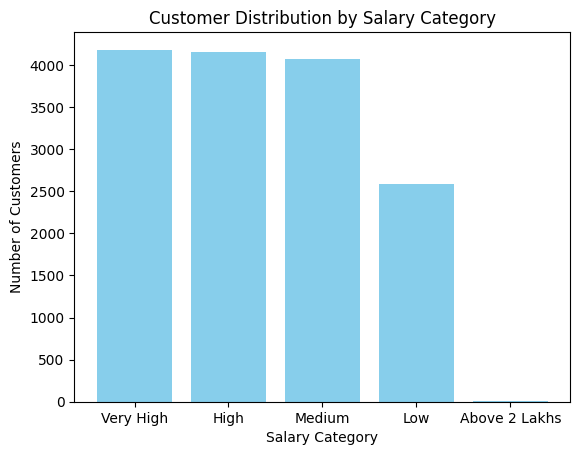

In [26]:
# Create a new column called Salary Category with the following buckets:
# Low (≤ 50,000)
# Medium (50,001 – 100,000)
# High (100,001 – 150,000)
# Very High (150,001 – 200,000)
# Above 2 Lakhs (> 200,000)
# Count how many customers fall into each group and plot the result.


df["Salary Category"] = np.where(df["salary"] <= 50000, "Low",
                         np.where(df["salary"] <= 100000, "Medium",
                         np.where(df["salary"] <= 150000, "High",
                         np.where(df["salary"] <= 200000, "Very High", "Above 2 Lakhs"))))

# Count customers in each category
salary_counts = df["Salary Category"].value_counts()

# series datatype
print(salary_counts)

# Plot salary distribution
# Here, index indicates the labels and values indicate total no of customers that fall into that label
plt.bar(salary_counts.index, salary_counts.values, color="skyblue")
plt.xlabel("Salary Category")
plt.ylabel("Number of Customers")
plt.title("Customer Distribution by Salary Category")
plt.show()


# Compare Customer Segments Using Grouped Statistics

# Bivariate Analysis

In [27]:
# Calculate Average Number of Products Based on Customer Tenure

tenure_product_analysis = df.groupby("tenure")["num_of_products"].mean()
# Display results
print("Average Number of Products Based on Customer Tenure:")
print(tenure_product_analysis)

Average Number of Products Based on Customer Tenure:
tenure
1     1.433551
2     1.444779
3     1.437894
4     1.476880
5     1.495677
6     1.490417
7     1.368132
8     1.481707
9     1.511556
10    1.514377
Name: num_of_products, dtype: float64


# Multivariate Analysis

In [28]:
# Grouping by churn status to analyze salary and product usage
churn_analysis = df.groupby("exited")[["salary", "num_of_products"]].mean()
print(churn_analysis)

               salary  num_of_products
exited                                
0       115263.672522         1.509778
1        89064.273504         1.260171


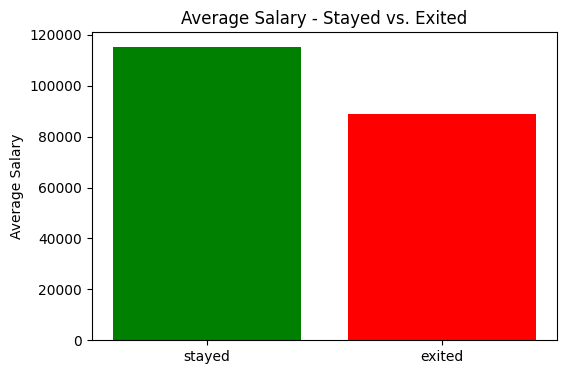

In [29]:
# Bar chart to compare salary for exited vs. retained customers
plt.figure(figsize=(6, 4))
plt.bar(["stayed", "exited"], churn_analysis["salary"], color=["green", "red"])
plt.title("Average Salary - Stayed vs. Exited")
plt.ylabel("Average Salary")
plt.show()

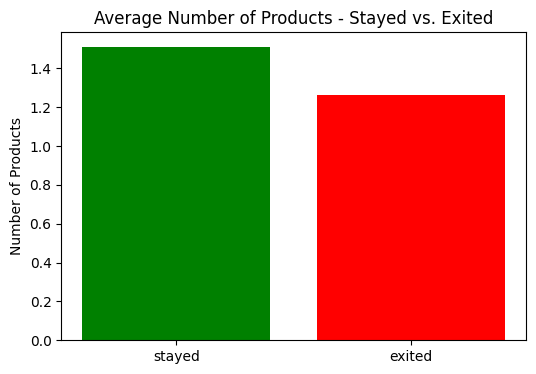

In [30]:
# Bar chart to compare product usage for exited vs. retained customers
plt.figure(figsize=(6, 4))
plt.bar(["stayed", "exited"], churn_analysis["num_of_products"], color=["green", "red"])
plt.title("Average Number of Products - Stayed vs. Exited")
plt.ylabel("Number of Products")
plt.show()

# Demographic Analysis
Demographic factors are measurable characteristics of a population, typically used to segment and understand customers better. Without understanding these factors, companies may:

Offer generic solutions that don’t resonate with specific customer segments.
Miss out on early signs of churn in high-risk groups.
Fail to optimize marketing campaigns for the right audiences.

In [31]:
# The dataset got updated and we have a new version though this is in cleaned format already with the missing values handled
import pandas as pd

# Load the dataset
df = pd.read_csv("https://gitlab.crio.do/me_notebook/me_jupyter_bankattritionanalysis/-/raw/master/bank_dataset_v3.csv",header=0,skiprows=[1])

# Display the first few rows
print(df.head())

df["card_type"] = df["card_type"].str.upper().str.strip()
df['card_type'].unique()

   rownumber customerid first_name        state  gender  age  tenure  \
0          2    MH00002      Rohan  Maharashtra    Male   54       4   
1          3    KA00003     Ananya    Karnataka  Female   58       1   
2          4    MH00004    Nandini  Maharashtra  Female   39       2   
3          5    WB00005     Charvi  West Bengal  Female   25       3   
4          6    KA00006      Ritik    Karnataka    Male   48       3   

   creditscore    balance  hascrcard  ...  salary  exited  complain  \
0          600  163508.11          1  ...   62000       0         0   
1          724  138773.12          1  ...   97000       0         0   
2          695  136048.53          1  ...  157000       0         0   
3          675   27798.19          0  ...  146000       0         0   
4          600  181554.57          1  ...  102000       0         0   

   numcomplain  satisfaction_score  point_earned  preferredchannel    region  \
0            0                  10           150            

array(['GOLD', 'PLATINUM', 'NOT APPLICABLE', 'SILVER'], dtype=object)

# 1. Visualize customers by churn status

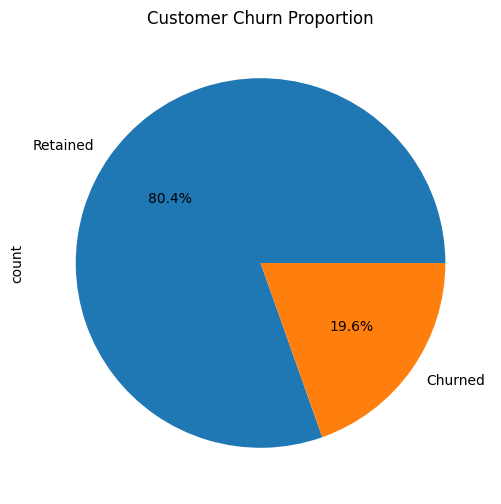

In [32]:
# 1. Count the number of churned and non-churned customers using value_counts() on the 'exited' column.
# 2. Create labels for the pie chart, 'Retained' for non-churned and 'Churned' for exited customers.
# 3. Generate a pie chart to visualize the proportion of churned vs. retained customers.
#    - Display the labels on the pie chart with percentages formatted to 1 decimal place.
#    - Add a title "Customer Churn Proportion".


# Step 1: Count no of churned and non churned customers
churn_counts = df['exited'].value_counts()
# print(churn_counts)
# Step 2: Label retained and churned
labels = ['Retained', 'Churned']
# Step 3: Create pie chart
# Create pie chart
plt.figure(figsize=(6, 6))
churn_counts.plot(kind='pie', labels=labels, autopct='%1.1f%%')
plt.title('Customer Churn Proportion')
plt.show()

# 2. Churn variation across states

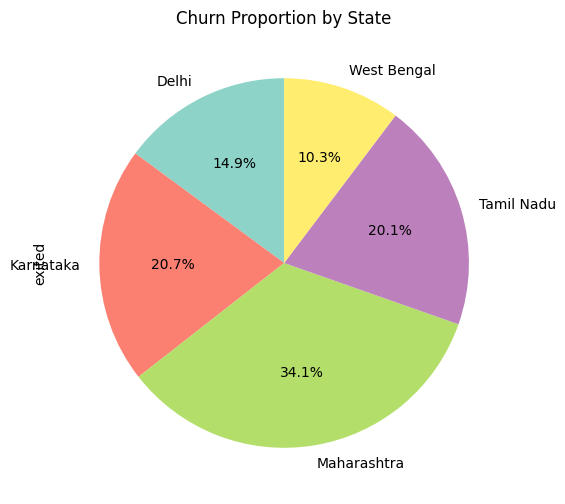

In [33]:
# 1. Group the data based on the 'state' column using groupby().
# 2. Extract the 'exited' column for churned customers within each state.
# 3. Calculate the total number of churned customers per region by summing the 'exited' column for each group.
# 4. Plot a pie chart to visualize the churn distribution by region.
#    - Display the percentages of churned customers for each region.
#    - Add a title "Churn Proportion by Region".

# Step 1: Group the data by region
region_grouped = df.groupby('state')
# Step 2: Extract the 'exited' column for churned customers
region_exited = region_grouped['exited']
# Step 3: Calculate the total number of churned customers per region
region_churn_counts = region_exited.sum()
# Step 4: Plot a pie chart to visualize churn distribution by region
plt.figure(figsize=(8, 6))
region_churn_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Churn Proportion by State')
plt.show()

# 3. Visualize age vs exit status

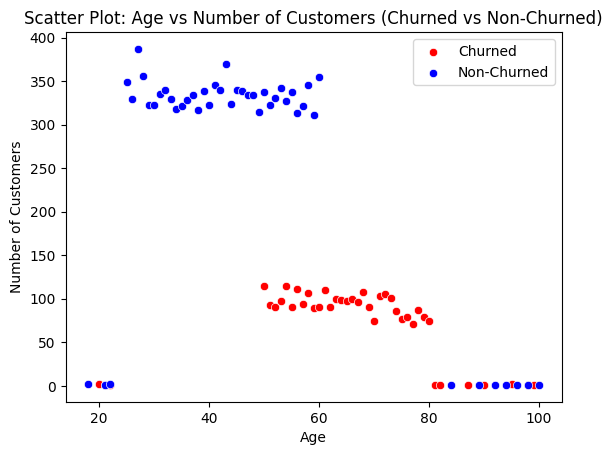

In [34]:
# 1. Count the number of churned and non-churned customers by age:
#    - Filter the data for churned customers (exited == 1) and group by 'age', then count the occurrences.
#    - Filter the data for non-churned customers (exited == 0) and group by 'age', then count the occurrences.
# 2. Plot a scatter plot to visualize the number of churned vs non-churned customers across ages:
#    - Use red color for churned customers and blue for non-churned customers.
#    - Set the title to "Scatter Plot: Age vs Number of Customers (Churned vs Non-Churned)".
#    - Label the x-axis as "Age" and the y-axis as "Number of Customers".
#    - Add a legend to differentiate between churned and non-churned customers.

# Step 1: Count churned and non-churned customers by age
churned_count = df[df['exited'] == 1].groupby('age').size()
non_churned_count = df[df['exited'] == 0].groupby('age').size()
# Step 2: Plot in a scatter plot
sns.scatterplot(x=churned_count.index, y=churned_count.values, color='red', label='Churned')
sns.scatterplot(x=non_churned_count.index, y=non_churned_count.values, color='blue', label='Non-Churned')
# Step 3: Customize the plot
plt.title("Scatter Plot: Age vs Number of Customers (Churned vs Non-Churned)")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()


# 4. Visualize age-distribution and exit status

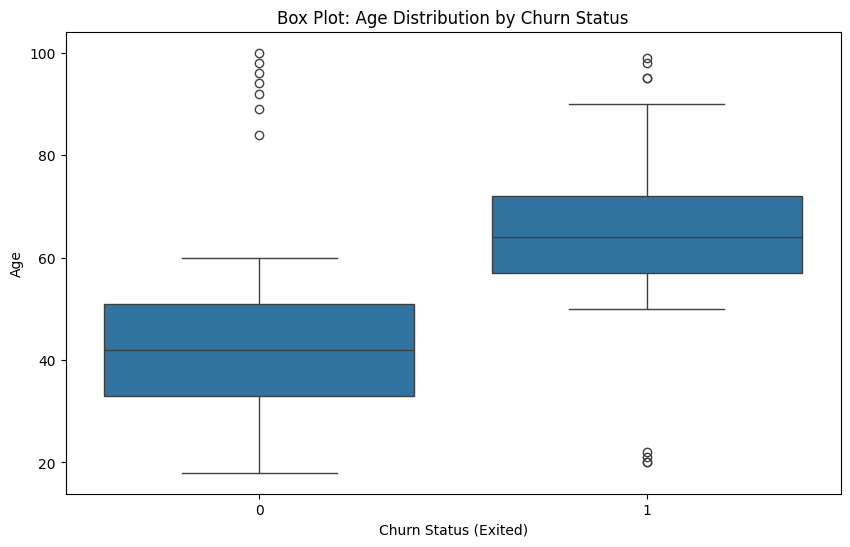

In [35]:
# 1. Create a box plot to visualize the distribution of age by churn status:
#    - Use the 'exited' column for the x-axis (churn status) and the 'age' column for the y-axis (age distribution).
#    - Set the title to "Box Plot: Age Distribution by Churn Status".
#    - Label the x-axis as "Churn Status (Exited)".
#    - Label the y-axis as "Age".


plt.figure(figsize=(10, 6))
sns.boxplot(x='exited', y='age', data=df)
plt.title("Box Plot: Age Distribution by Churn Status")
plt.xlabel("Churn Status (Exited)")
plt.ylabel("Age")
plt.show()


# 5. Visualize gender and exit status

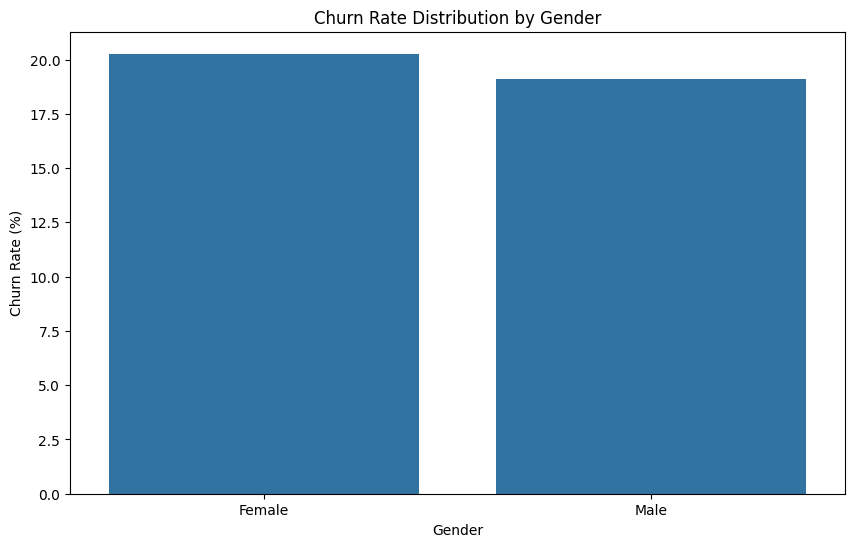

In [36]:
# 1. Filter the dataset to get only customers who have exited (churned) by using the 'exited' column.
# 2. Count the total number of customers per gender by grouping the data by 'gender' and counting the 'exited' column.
# 3. Count the number of churned customers per gender by filtering for churned customers and grouping by 'gender'.
# 4. Calculate the churn rate per gender manually:
#    - Divide the number of churned customers by the total number of customers per gender, then multiply by 100 to get the percentage.
# 5. Plot a bar plot to visualize the churn rate by gender:
#    - Plot the churn rate values against gender on the x-axis.
#    - Set the title to "Churn Rate Distribution by Gender".
#    - Label the x-axis as "Gender" and the y-axis as "Churn Rate (%)".


# Step 1: Filter for customers who have exited (churned)
churned_customers_df = df[df['exited'] == 1]
# Step 2: Count total customers per gender
total_customers_by_gender = df.groupby('gender')['exited'].count()
# Step 3: Count churned customers per gender
churned_customers_by_gender = churned_customers_df.groupby('gender')['exited'].count()
# Step 4: Calculate churn rate manually
churn_rate_by_gender = (churned_customers_by_gender / total_customers_by_gender) * 100
# Step 5: Plot churn rate by gender
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_gender.index, y=churn_rate_by_gender.values)
plt.title("Churn Rate Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Churn Rate (%)")
plt.show()


# 6. Churn Rate by Region and Gender

<Figure size 1200x600 with 0 Axes>

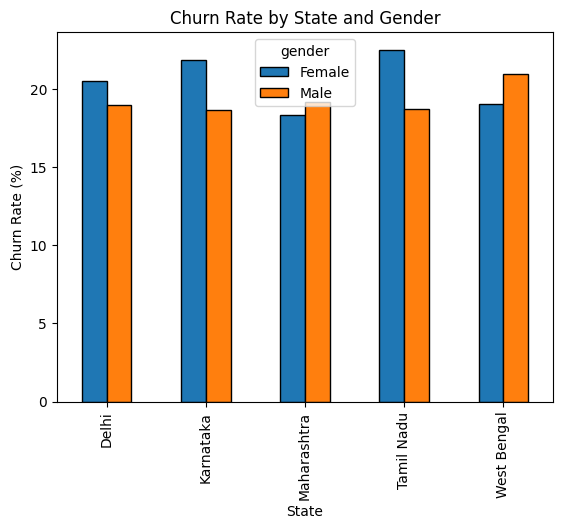

In [37]:
# 1. Group the data by both 'state' and 'gender' using the groupby() function.
# 2. Count the total number of customers in each group by counting the 'exited' column for each group.
# 3. Count the churned customers in each group by summing the 'exited' column (since 'exited' is 1 for churned customers).
# 4. Calculate the churn rate for each group manually:
#    - Divide the number of churned customers by the total number of customers in each group, then multiply by 100 to get the percentage.
# 5. Unstack the churn rate to separate the data by gender for better visualization in the plot.
# 6. Plot a bar chart to visualize the churn rate by state and gender:
#    - Use a bar plot with black edges around the bars.
#    - Set the title to 'Churn Rate by State and Gender'.
#    - Label the x-axis as 'State' and the y-axis as 'Churn Rate (%)'.

# Step 1: Group data by state and gender
grouped_data = df.groupby(['state', 'gender'])

# Step 2: Count total customers for each group
total_customers = grouped_data['exited'].count()

# Step 3: Count churned customers for each group
churned_customers = grouped_data['exited'].sum()  # Since 'exited' is 1 for churned customers

# Step 4: Calculate churn rate manually
churn_rate = (churned_customers / total_customers) * 100

churn_rate_unstacked = churn_rate.unstack()

# Step 5: Plot a bar chart
plt.figure(figsize=(12, 6))

churn_rate_unstacked.plot(kind='bar', edgecolor='black')

# Step 6: Customize the plot
plt.title('Churn Rate by State and Gender')
plt.xlabel('State')
plt.ylabel('Churn Rate (%)')
plt.show()



# 7. Relationship between income groups - salary and churn rate

/tmp/ipython-input-2895955703.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_customers_by_income = df.groupby('income_group')['exited'].count()
/tmp/ipython-input-2895955703.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churned_customers_by_income = df.groupby('income_group')['exited'].sum()


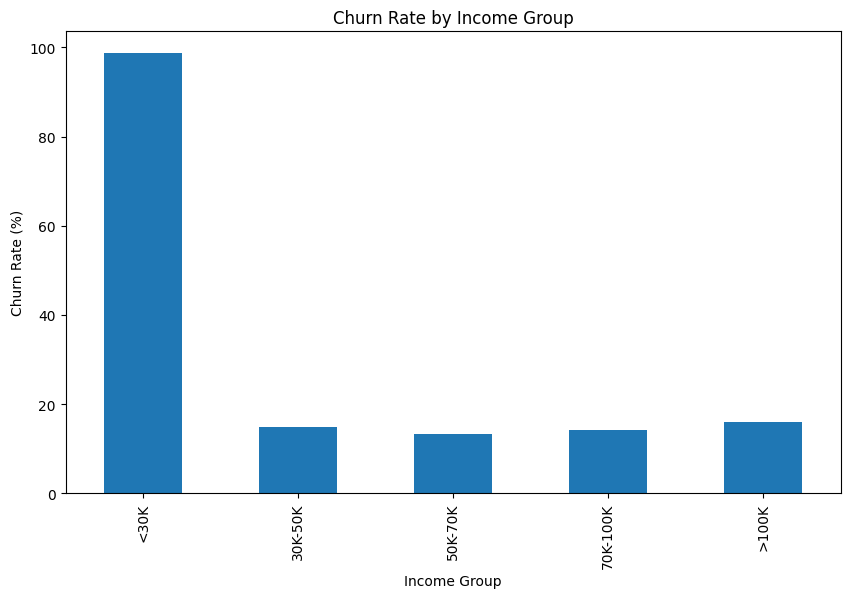

In [38]:
# 1. Create income bins (ranges) to categorize customers by income:
#    - Define the bins as [0, 30000, 50000, 70000, 100000, 150000] to represent different income ranges.
#    - Label the bins as '<30K', '30K-50K', '50K-70K', '70K-100K', '>100K'.
# 2. Assign customers to income groups based on their salary using the pd.cut() function and the defined bins and labels.
# 3. Count the total number of customers in each income group by grouping by 'income_group' and counting the 'exited' column.
# 4. Count the number of churned customers in each income group by grouping by 'income_group' and summing the 'exited' column.
# 5. Calculate the churn rate for each income group manually:
#    - Divide the number of churned customers by the total number of customers in each income group, then multiply by 100 to get the percentage.
# 6. Plot a bar chart to visualize the churn rate by income group:
#    - Use a bar chart to display the churn rate for each income group.
#    - Set the title to 'Churn Rate by Income Group'.
#    - Label the x-axis as 'Income Group' and the y-axis as 'Churn Rate (%)'.


# Step 1: Create income bins (ranges)
bins = [0, 30000, 50000, 70000, 100000, 150000]  # Example income ranges
labels = ['<30K', '30K-50K', '50K-70K', '70K-100K', '>100K']

# Step 2: Assign income group labels
df['income_group'] = pd.cut(df['salary'], bins=bins, labels=labels)

# Step 3: Count total customers in each income group
total_customers_by_income = df.groupby('income_group')['exited'].count()

# Step 4: Count churned customers in each income group
churned_customers_by_income = df.groupby('income_group')['exited'].sum()

# Step 5: Calculate churn rate manually and convert to percentage
churn_rate_by_income = (churned_customers_by_income / total_customers_by_income) * 100

# Step 6: Plot a bar chart
plt.figure(figsize=(10, 6))
churn_rate_by_income.plot(kind='bar')
plt.title('Churn Rate by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Churn Rate (%)')
plt.show()

In [39]:
# 1. Define bins and labels for age groups:
#    - Set the age bins as [18, 30, 45, 60, 100] to categorize customers into different age ranges.
#    - Define the corresponding labels for these age ranges as ['18-30', '31-45', '46-60', '60+'].
# 2. Apply pd.cut() to create age groups in the 'age_group' column:
#    - Use the defined age bins and labels, and set right=False to include the left endpoint of each bin.
# 3. Print the first few rows of the dataframe to verify the new 'age_group' column.


# Step 1: Define bins and labels for age groups
age_bins = [18, 30, 45, 60, 100]  # Age ranges
age_labels = ['18-30', '31-45', '46-60', '60+']  # Corresponding labels

# Step 2: Apply pd.cut() to create age groups
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

print(df.head())

   rownumber customerid first_name        state  gender  age  tenure  \
0          2    MH00002      Rohan  Maharashtra    Male   54       4   
1          3    KA00003     Ananya    Karnataka  Female   58       1   
2          4    MH00004    Nandini  Maharashtra  Female   39       2   
3          5    WB00005     Charvi  West Bengal  Female   25       3   
4          6    KA00006      Ritik    Karnataka    Male   48       3   

   creditscore    balance  hascrcard  ... complain  numcomplain  \
0          600  163508.11          1  ...        0            0   
1          724  138773.12          1  ...        0            0   
2          695  136048.53          1  ...        0            0   
3          675   27798.19          0  ...        0            0   
4          600  181554.57          1  ...        0            0   

   satisfaction_score  point_earned  preferredchannel    region  \
0                  10           150            Mobile   Western   
1                   5         

# 8. Churn rates across regions and genders

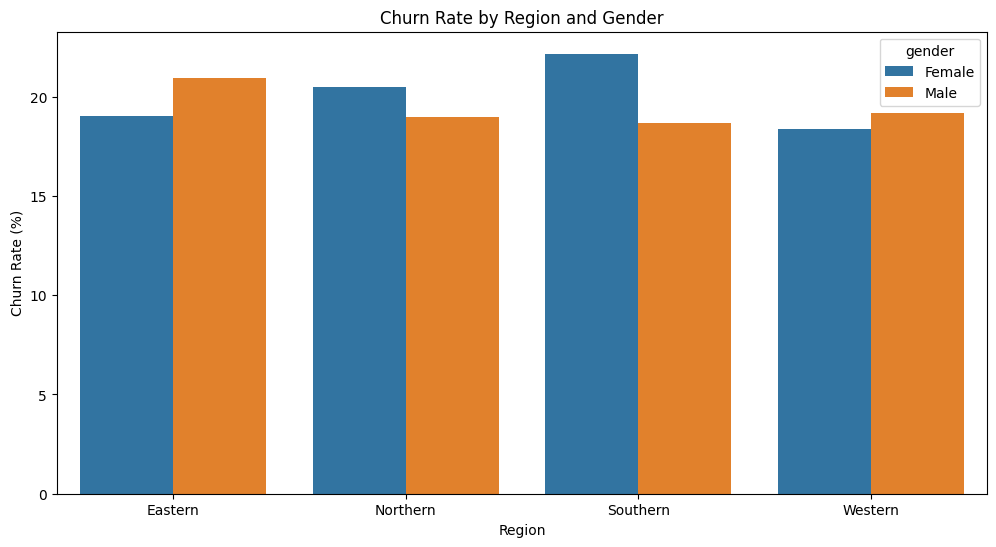

In [40]:
# 1. Group the data by 'region' and 'gender' using the groupby() function.
# 2. Count the total number of customers in each region-gender group by counting the 'exited' column.
# 3. Count the number of churned customers in each region-gender group by summing the 'exited' column (since 'exited' is 1 for churned customers).
# 4. Calculate the churn rate for each region-gender group manually:
#    - Divide the number of churned customers by the total number of customers in each group, then multiply by 100 to get the percentage.
# 5. Convert the churn rate series into a DataFrame for easier visualization by resetting the index and naming the new column 'churn_rate'.
# 6. Plot a bar chart to visualize the churn rate by region and gender:
#    - Use the 'region' column for the x-axis, 'churn_rate' for the y-axis, and 'gender' for the hue (legend) to differentiate between male and female.
#    - Set the title to 'Churn Rate by Region and Gender'.
#    - Label the x-axis as 'Region' and the y-axis as 'Churn Rate (%)'.


# Calculate the churn rate by region and gender

# Step 1: Group data by region and gender
grouped_data = df.groupby(['region', 'gender'])

# Step 2: Count total customers for each region-gender group
total_customers = grouped_data['exited'].count()

# Step 3: Count churned customers for each region-gender group
churned_customers = grouped_data['exited'].sum()  # 'exited' is 1 for churned customers

# Step 4: Calculate churn rate manually
churn_rate = (churned_customers / total_customers) * 100

# Step 5: Convert the series into a DataFrame for visualization
churn_rate_region_gender = churn_rate.reset_index(name='churn_rate')

# Step 6: Plot a bar chart to visualize churn rate by region and gender
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='churn_rate', hue='gender', data=churn_rate_region_gender)

# Step 7: Customize the plot
plt.title('Churn Rate by Region and Gender')
plt.xlabel('Region')
plt.ylabel('Churn Rate (%)')

# Step 8: Display the plot
plt.show()


# 9. Average satisfaction score for age groups

/tmp/ipython-input-2440734761.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_churned_per_age_group = churned_customers.groupby('age_group')['satisfaction_score'].count()
/tmp/ipython-input-2440734761.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_satisfaction_churned = churned_customers.groupby('age_group')['satisfaction_score'].mean().reset_index(name="avg_satisfaction_score")


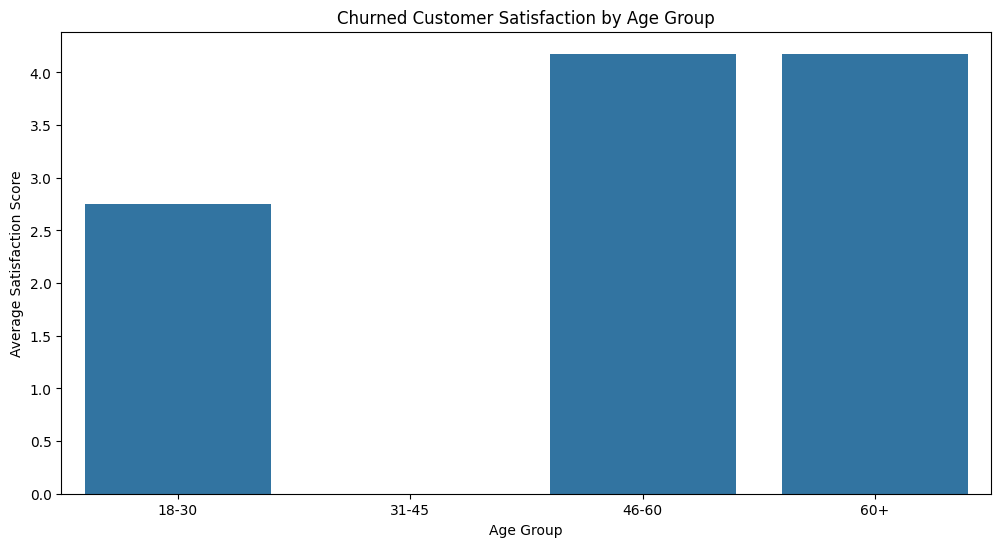

In [41]:
# 1. Filter the dataset to include only churned customers by selecting rows where 'exited' == 1.
# 2. Group the churned customers by 'age_group' and calculate the total number of churned customers in each group.
#    - Count the 'satisfaction_score' values for each 'age_group' to get the total churned customers per group.
# 3. Calculate the average satisfaction score for churned customers in each age group:
#    - Group the churned customers by 'age_group' and calculate the mean of the 'satisfaction_score' column.
#    - Reset the index and name the new column 'avg_satisfaction_score'.
# 4. Drop any rows where the 'avg_satisfaction_score' is NaN to clean up the data.
# 5. (Optional) Remove unused categories from the 'age_group' column if it's a categorical column with unused categories.
# 6. Print the resulting DataFrame to verify the data.
# 7. Plot a bar chart to visualize the average satisfaction score for churned customers by age group:
#    - Use 'age_group' for the x-axis and 'avg_satisfaction_score' for the y-axis.
#    - Set the title to 'Churned Customer Satisfaction by Age Group'.
#    - Label the x-axis as 'Age Group' and the y-axis as 'Average Satisfaction Score'.


# Step 1: Filter for churned customers where 'exited' == 1
churned_customers = df[df['exited'] == 1]

# Group by 'age_group' and calculate the average satisfaction score for churned customers
# Step 2: Count total churned customers per age group
total_churned_per_age_group = churned_customers.groupby('age_group')['satisfaction_score'].count()

# Step 3: Calculate the mean of satisfaction scores per age group
avg_satisfaction_churned = churned_customers.groupby('age_group')['satisfaction_score'].mean().reset_index(name="avg_satisfaction_score")

avg_satisfaction_churned = avg_satisfaction_churned.dropna(subset=['avg_satisfaction_score'])
# Remove unused categories from the 'age_group' column
# avg_satisfaction_churned['age_group'] = avg_satisfaction_churned['age_group'].cat.remove_unused_categories()
# print(avg_satisfaction_churned)
# Assuming df has 'age_group' and 'satisfaction_score' columns
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='avg_satisfaction_score', data=avg_satisfaction_churned)
plt.title('Churned Customer Satisfaction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Satisfaction Score')
plt.show()



# 10. Count of customers by employment type, highlighting churned vs non-churned customers

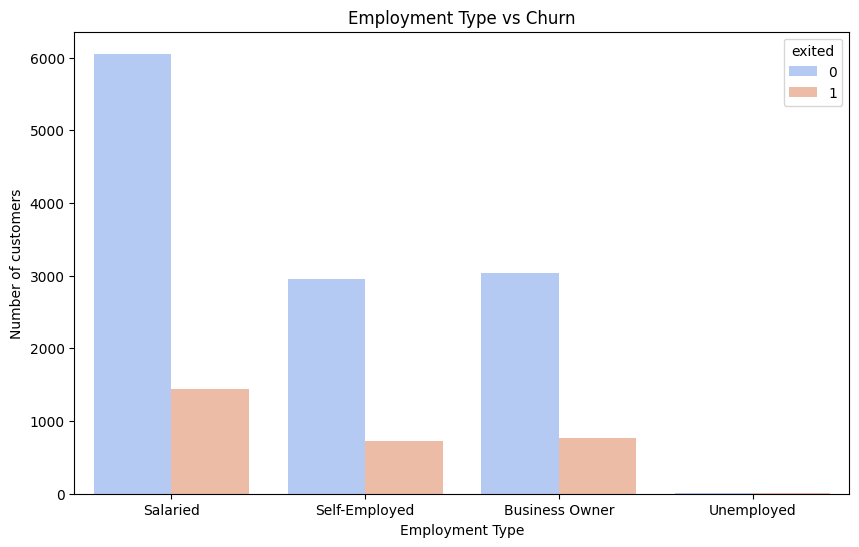

In [42]:
# 1. Group the data by 'employment_type' and 'exited' (churn status) and count the occurrences of each combination:
#    - Use groupby() to group by both 'employment_type' and 'exited', then apply size() to count the occurrences in each group.
#    - Reset the index of the result to make it easier to work with.
# 2. Create a count plot to visualize the relationship between 'employment_type' and churn status:
#    - Use 'employment_type' for the x-axis and 'exited' (churn status) for the hue to differentiate between churned and non-churned customers.
# 3. Customize the plot:
#    - Set the title to "Employment Type vs Churn".
#    - Label the x-axis as "Employment Type" and the y-axis as "Number of customers".


# Get numeric counts for each employment type and churn status
counts = df.groupby(['employment_type', 'exited']).size().reset_index()
# print(counts)
# Count Plot: Employment Type vs. Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='employment_type', hue='exited', data=df, palette='coolwarm')
plt.title("Employment Type vs Churn")
plt.xlabel("Employment Type")
plt.ylabel("Number of customers")
plt.show()

## Product Analysis


In [44]:
df.columns

Index(['rownumber', 'customerid', 'first_name', 'state', 'gender', 'age',
       'tenure', 'creditscore', 'balance', 'hascrcard', 'card_type', 'hasloan',
       'hasfd', 'numofproducts', 'isactivemember', 'salary', 'exited',
       'complain', 'numcomplain', 'satisfaction_score', 'point_earned',
       'preferredchannel', 'region', 'employment_type', 'residential_status',
       'income_group', 'age_group'],
      dtype='object')

### 1. Credit card distribution among churned customers

/tmp/ipython-input-437789876.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




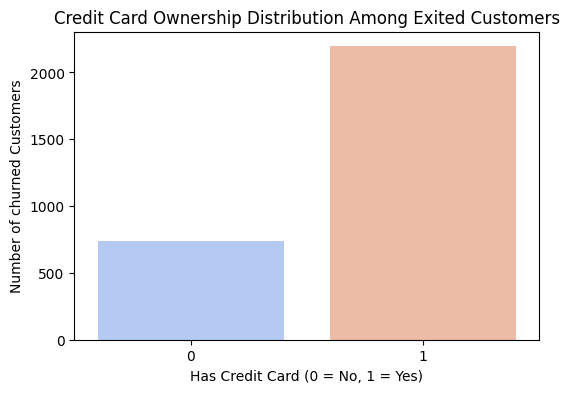

In [45]:
# 1. Filter the dataset to include only customers who have exited, i.e., where the 'exited' column is equal to 1.
# 2. Create a count plot to visualize the distribution of credit card ownership among the exited customers.
#    - Use a seaborn countplot to show how many exited customers have a credit card (column 'hascrcard', where 0 = No, 1 = Yes).
#    - Apply a color palette ("coolwarm") for the plot to visually differentiate between categories.
# 3. Set the plot title to "Credit Card Ownership Distribution Among Exited Customers" to describe the plot's content.
# 4. Label the x-axis as "Has Credit Card (0 = No, 1 = Yes)" to clarify what the x-axis represents.
# 5. Label the y-axis as "Number of churned Customers" to explain what the y-axis represents.
# 6. Display the plot using plt.show() to visualize the results.



# Filter the dataset where 'isexited' == 1 (indicating customers who have exited)
exited_customers = df[df['exited'] == 1]

# # Create a count plot for credit card ownership among exited customers
plt.figure(figsize=(6, 4))
sns.countplot(x=exited_customers["hascrcard"],palette="coolwarm")
plt.title("Credit Card Ownership Distribution Among Exited Customers")
plt.xlabel("Has Credit Card (0 = No, 1 = Yes)")
plt.ylabel("Number of churned Customers")
plt.show()


   hascrcard  exited  count
0          0       0   2494
1          0       1    738
2          1       0   9554
3          1       1   2195
14981


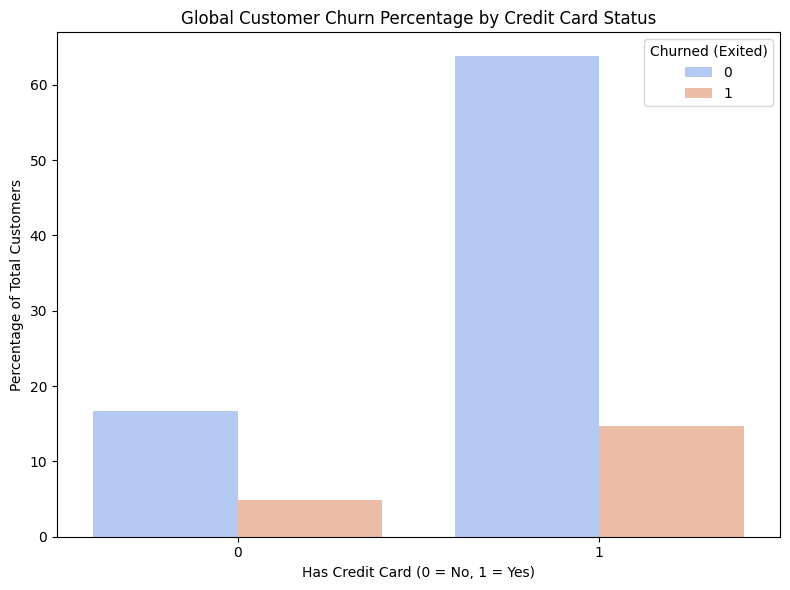

In [46]:
# 1. Group the data by 'hascrcard' and 'exited' to count the number of customers in each group.
# 2. Calculate the total number of customers.
# 3. Calculate the percentage of each group based on the total number of customers.
# 4. Create a bar plot to visualize the churn percentage by credit card ownership.
# 5. Set the plot title to 'Global Customer Churn Percentage by Credit Card Status'.
# 6. Label the x-axis as 'Has Credit Card (0 = No, 1 = Yes)' and the y-axis as 'Percentage of Total Customers'.
# 7. Add a legend with the title 'Churned (Exited)'.
# 8. Display the plot.


# Step 1: Group by 'hascrcard' and 'exited' and count number of customers in each group
group_counts = df.groupby(['hascrcard', 'exited']).size().reset_index(name='count')

print(group_counts)

# Step 2: Calculate total number of customers
total_customers = group_counts['count'].sum()
#
print(total_customers)

# Step 3: Calculate percentage as (group count / total count) * 100
group_counts['percentage'] = (group_counts['count'] / total_customers) * 100

# Step 4: Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=group_counts, x='hascrcard', y='percentage', hue='exited', palette="coolwarm", errorbar=None)

# Enhancing the plot
plt.title('Global Customer Churn Percentage by Credit Card Status')
plt.xlabel('Has Credit Card (0 = No, 1 = Yes)')
plt.ylabel('Percentage of Total Customers')
plt.legend(title='Churned (Exited)')
plt.tight_layout()
plt.show()

### 2. Credit card type distribution across churn status

        card_type  exited  count  percentage
0            GOLD       0   3864       25.79
1            GOLD       1    230        1.54
2  NOT APPLICABLE       0   2492       16.63
3  NOT APPLICABLE       1    736        4.91
4        PLATINUM       0   2365       15.79
5        PLATINUM       1    988        6.60
6          SILVER       0   3327       22.21
7          SILVER       1    979        6.53


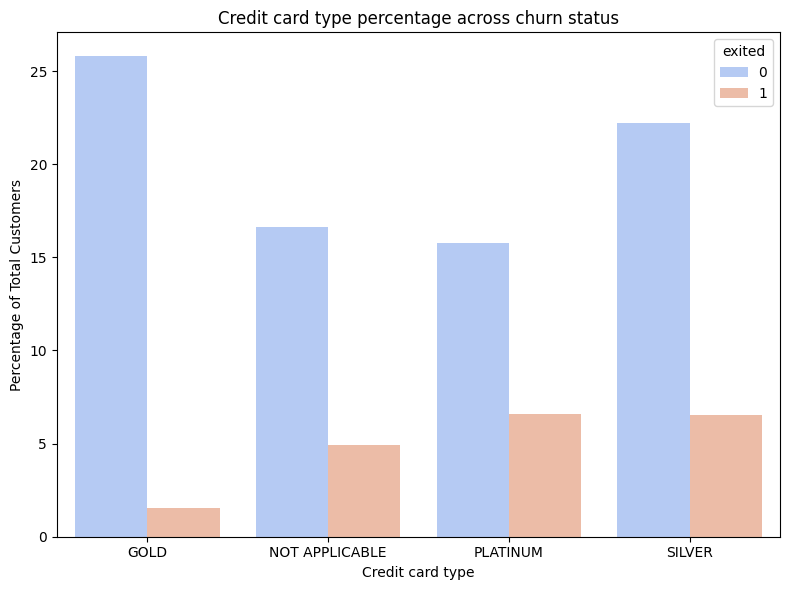

In [47]:
# 1. Group the data by 'card_type' and 'exited' to count the number of customers in each group.
# 2. Calculate the total number of customers.
# 3. Calculate the percentage of each group and round the result to two decimal places.
# 4. Create a bar plot to visualize the percentage of customers by card type and churn status.
# 5. Set the plot title to 'Credit card type percentage across churn status'.
# 6. Label the x-axis as 'Credit card type' and the y-axis as 'Percentage of Total Customers'.
# 7. Display the plot.


# Step 1: Group by 'card_type' and 'exited' and count number of customers in each group
card_counts = df.groupby(['card_type', 'exited']).size().reset_index(name='count')

# Step 2: Calculate total number of customers
total_customers = card_counts['count'].sum()

# Step 3: Calculate percentage as (group count / total count) * 100 and round
card_counts['percentage'] = ((card_counts['count'] / total_customers) * 100).round(2)

print(card_counts)

# Step 4: Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=card_counts, x='card_type', y='percentage', hue='exited', palette="coolwarm", errorbar=None)

# Enhancing the plot
plt.title('Credit card type percentage across churn status')
plt.xlabel('Credit card type')
plt.ylabel('Percentage of Total Customers')
plt.tight_layout()
plt.show()


## 3. Loan ownership vs Churn

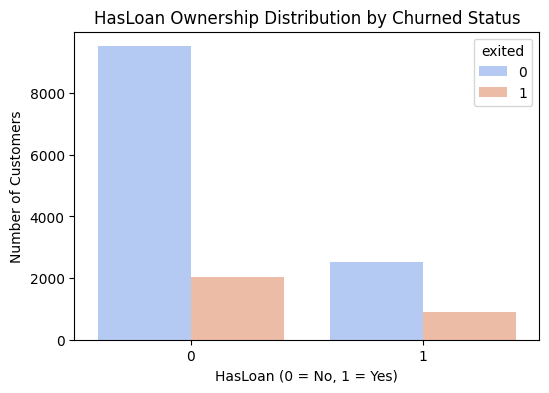

In [48]:
# 1. Create a count plot to visualize loan ownership distribution by churn status.
# 2. Use 'hasloan' for the x-axis and 'exited' for the hue (churn status).
# 3. Set the plot title to 'HasLoan Ownership Distribution by Churned Status'.
# 4. Label the x-axis as 'HasLoan (0 = No, 1 = Yes)' and the y-axis as 'Number of Customers'.
# 5. Display the plot.


plt.figure(figsize=(6, 4))
sns.countplot(x=df["hasloan"], hue=df["exited"], palette="coolwarm")
plt.title("HasLoan Ownership Distribution by Churned Status")
plt.xlabel("HasLoan (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.show()


###  4. Number of products vs churn

/tmp/ipython-input-167445454.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




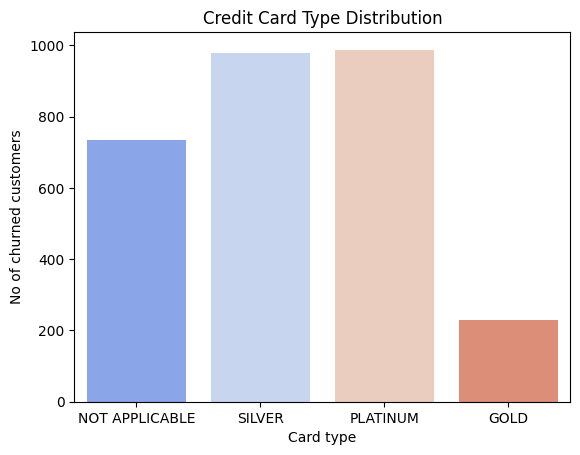

In [49]:
# 1. Filter the dataset to include only customers who have exited (where 'exited' == 1).
# 2. Create a count plot to visualize the distribution of credit card types among exited customers.
# 3. Set the plot title to 'Credit Card Type Distribution'.
# 4. Label the x-axis as 'Card type' and the y-axis as 'No of churned customers'.
# 5. Display the plot.



# Filter the dataset where 'isexited' == 1 (indicating customers who have exited)
exited_customers = df[df['exited'] == 1]

# Credit Card Type Distribution
# plt.figure(figsize=(8, 4))
sns.countplot(x=exited_customers["card_type"], palette="coolwarm")
plt.title("Credit Card Type Distribution")
plt.xlabel("Card type")
plt.ylabel("No of churned customers")
plt.show()


## 5. Product distribution across churn

Credit card: 
exited
0    9554
1    2195
dtype: int64
Loan count: 
exited
0    2529
1     913
dtype: int64
HasLoan count: 
exited
0    6061
1     609
dtype: int64


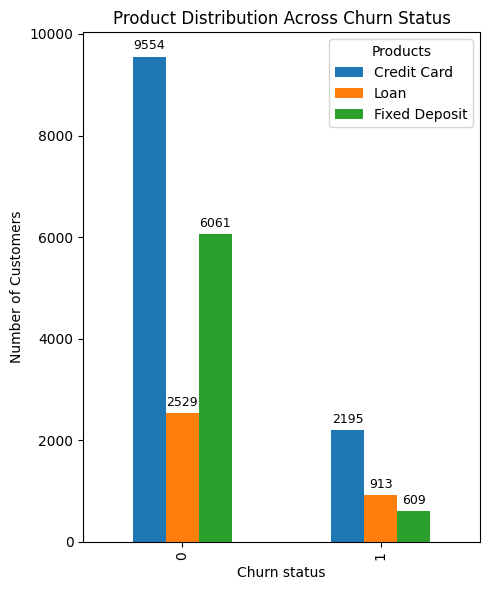

In [50]:
# 1. Group the dataset by churn status ('exited') and each product ('hascrcard', 'hasloan', 'hasfd') to count the number of customers for each.
# 2. Combine the counts into a DataFrame for easier plotting.
# 3. Create a bar plot to visualize the product distribution across churn status.
# 4. Annotate each bar in the plot with the count of customers.
# 5. Set the plot title to 'Product Distribution Across Churn Status', label the axes, and display the legend.
# 6. Display the plot.


# Step 1: Group by churn status and each product
crcard = df[df['hascrcard'] == 1].groupby('exited').size()
print("Credit card: ")
print(crcard)

loan = df[df['hasloan'] == 1].groupby('exited').size()
print("Loan count: ")
print(loan)

fd = df[df['hasfd'] == 1].groupby('exited').size()
print("HasLoan count: ")
print(fd)

# Step 2: Combine into a DataFrame
product_dist = pd.DataFrame({
    'Credit Card': crcard,
    'Loan': loan,
    'Fixed Deposit': fd
})

# Step 1: Plot the bar chart
ax = product_dist.plot(kind='bar', figsize=(5, 6))

# Step 2: Automatically label bars
ax.bar_label(ax.containers[0], fontsize=9, padding=3)
ax.bar_label(ax.containers[1], fontsize=9, padding=3)
ax.bar_label(ax.containers[2], fontsize=9, padding=3)


plt.title('Product Distribution Across Churn Status')
plt.xlabel('Churn status')
plt.ylabel('Number of Customers')
plt.legend(title='Products')
plt.tight_layout()
plt.show()


## 6. Average product usage by tenure groups across churn status

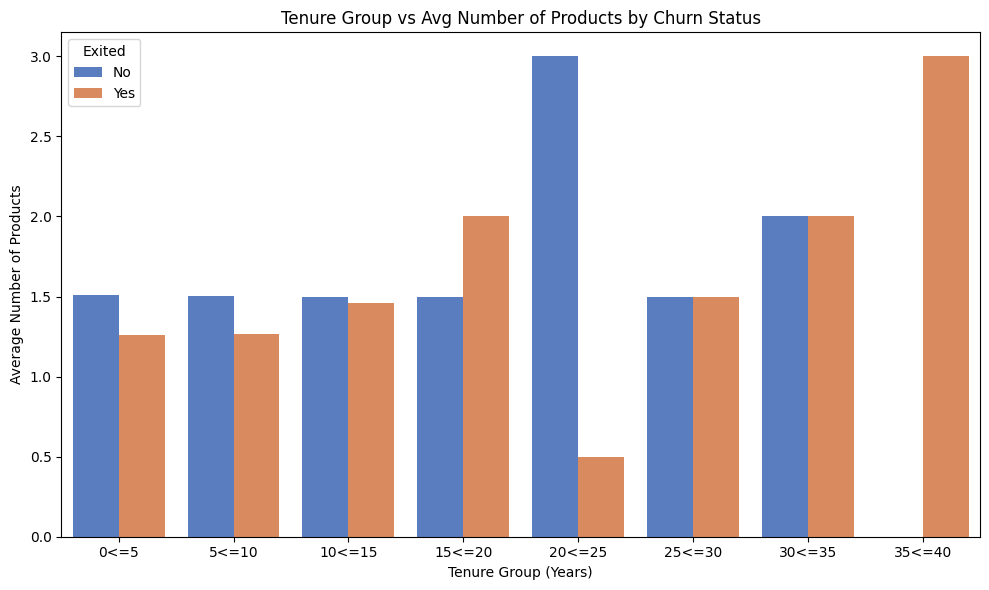

In [51]:
# 1. Create tenure groups by categorizing the 'tenure' column into bins of 5 years.
# 2. Create a bar plot to visualize the average number of products across tenure groups and churn status.
# 3. Set the x-axis label to 'Tenure Group (Years)' and the y-axis label to 'Average Number of Products'.
# 4. Set the plot title to 'Tenure Group vs Avg Number of Products by Churn Status'.
# 5. Add a legend indicating 'Exited' status, with labels 'No' and 'Yes'.
# 6. Display the plot.



# Step 1: Create tenure groups ---> Make this step simple by using array of value instead
tenure_bins = list(range(0, 41, 5))
tenure_labels = [f'{i}<={i+5}' for i in range(0, 36, 5)]
df['tenure_group'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels, right=False)

# Step 2: Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='tenure_group',
    y='numofproducts',
    hue='exited',
    palette='muted',
    errorbar=None
)
plt.xlabel('Tenure Group (Years)')
plt.ylabel('Average Number of Products')
plt.title('Tenure Group vs Avg Number of Products by Churn Status')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


## 7. Average number of products usage by given credit score ranges across churned status

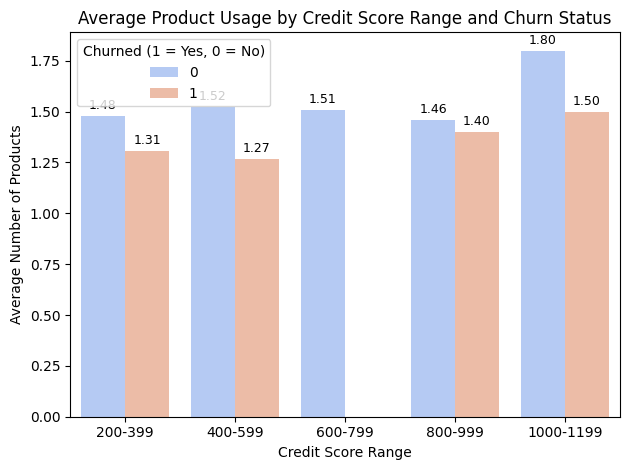

In [52]:
# 1. Create credit score bins to categorize the 'creditscore' column into specified ranges.
# 2. Create a bar plot to visualize the average number of products across credit score ranges and churn status.
# 3. Annotate each bar with the average value of the 'numofproducts'.
# 4. Set the plot title to 'Average Product Usage by Credit Score Range and Churn Status'.
# 5. Label the x-axis as 'Credit Score Range' and the y-axis as 'Average Number of Products'.
# 6. Add a legend indicating churn status, with labels 'Churned (1 = Yes, 0 = No)'.
# 7. Display the plot.


# Step 1: Create credit score bins

credit_bins = [200, 400, 600, 800, 1000, 1200]
credit_labels = ['200-399', '400-599', '600-799', '800-999', '1000-1199']

df['credit_score_range'] = pd.cut(df['creditscore'], bins=credit_bins, labels=credit_labels)

# Step 2: Set figure size
# plt.figure(figsize=(10, 6))

# Step 3: Create a bar plot for credit score range vs. number of products across churned status
ax = sns.barplot(
    data=df,
    x='credit_score_range',
    y='numofproducts',
    hue='exited',
    palette='coolwarm',
    errorbar=None
)

# Step 4: Annotate each bar with average value
for p in ax.patches:
    height = p.get_height()
    if pd.notnull(height) and height > 0:
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height + 0.02,
            s=f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=9
        )


# Step 4: Label the axes and title
plt.title('Average Product Usage by Credit Score Range and Churn Status')
plt.xlabel('Credit Score Range')
plt.ylabel('Average Number of Products')
plt.legend(title='Churned (1 = Yes, 0 = No)')
plt.tight_layout()
plt.show()


In [53]:
df.columns

Index(['rownumber', 'customerid', 'first_name', 'state', 'gender', 'age',
       'tenure', 'creditscore', 'balance', 'hascrcard', 'card_type', 'hasloan',
       'hasfd', 'numofproducts', 'isactivemember', 'salary', 'exited',
       'complain', 'numcomplain', 'satisfaction_score', 'point_earned',
       'preferredchannel', 'region', 'employment_type', 'residential_status',
       'income_group', 'age_group', 'tenure_group', 'credit_score_range'],
      dtype='object')

# **Feedback Analysis**

Assumption 1:
Customers with low satisfaction and low loyalty points are more likely to churn.

In [54]:
# Map 'exited' column to categorical labels
df["churn_status"] = df["exited"].map({0: "Stayed", 1: "Left"})

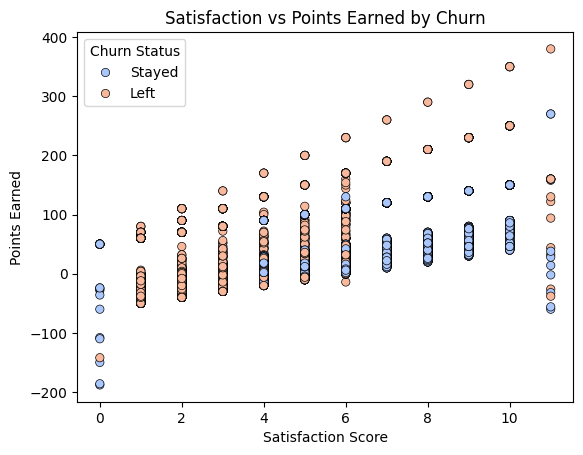

In [55]:
# TODO 1:
# - Use satisfaction_score as the X-axis.
# - Use point_earned as the Y-axis.
# - Color-code the points using the churn_status column (Stayed vs Left).
# - Use a scatter plot to show all points.
# - Chart title: Satisfaction vs Points Earned by Churn


import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plot

sns.scatterplot(
    data=df,
    x='satisfaction_score',
    y='point_earned',
    hue='churn_status',        # color-code based on churn status
    palette='coolwarm',        # optional color theme
    edgecolor='black'          # outline for visibility
)

# Add labels and title
plt.title('Satisfaction vs Points Earned by Churn')
plt.xlabel('Satisfaction Score')
plt.ylabel('Points Earned')

# Add legend
plt.legend(title='Churn Status')

# Display the plot
plt.show()

### Assumption 2:
### Customers who churn tend to have lower satisfaction scores than those who stay.

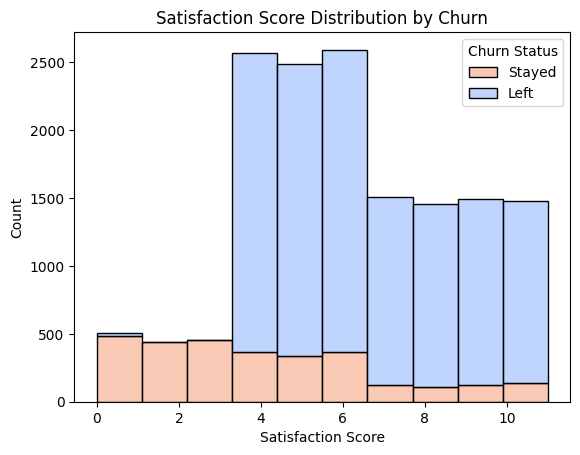

In [56]:
# TODO 2: Plot the histogram of satisfaction scores
# - Set 'satisfaction_score' as the variable on the x-axis
# - Use 'churn_status' as the hue to separate churned vs retained customers
# - Set number of bins to 10
# - Use 'stack' to stack churn categories on top of each other
# - Chart title: Satisfaction Score Distribution by Churn

import seaborn as sns
import matplotlib.pyplot as plt

# Create histogram
sns.histplot(
    data=df,
    x='satisfaction_score',
    hue='churn_status',      # separate by churned vs retained
    bins=10,                 # number of bins
    multiple='stack',        # stack bars
    palette='coolwarm',      # optional color palette
    edgecolor='black'        # outline for clarity
)

# Add labels and title
plt.title('Satisfaction Score Distribution by Churn')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')

# Add legend
plt.legend(title='Churn Status', labels=['Stayed', 'Left'])

# Display the plot
plt.show()


Assumption 3:
### Among those who complained, a higher proportion ended up churning.

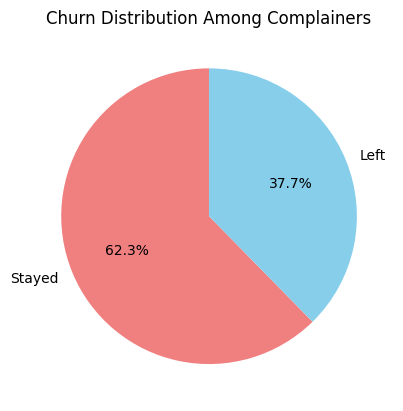

In [57]:
# TODO

# - Select only the row where complain = 1 (complainers).
# - Use .value_counts() and Normalize the values to get proportions (not raw counts).
# - Plot a pie chart for churn distribution among those who complained.
#  chart title: Churn Distribution Among Complainers


import matplotlib.pyplot as plt

# Step 1: Filter rows where complain = 1
complainers = df[df['complain'] == 1]

# Step 2: Calculate churn distribution (normalized to proportions)
churn_distribution = complainers['churn_status'].value_counts(normalize=True)

# Step 3: Plot a pie chart
plt.pie(
    churn_distribution,
    labels=churn_distribution.index,   # churn categories
    autopct='%1.1f%%',                 # show percentage
    colors=['lightcoral', 'skyblue'],  # optional colors
    startangle=90
)

# Step 4: Add title
plt.title('Churn Distribution Among Complainers')

# Display the chart
plt.show()


In [58]:
# Step 1: Calculate IQR
import numpy as np
Q1 = df["balance"].quantile(0.25)
Q3 = df["balance"].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper caps
lower_cap = Q1 - 1.5 * IQR
upper_cap = Q3 + 1.5 * IQR

# Step 3: Modify the original column directly
df["balance"] = np.where(df["balance"] > upper_cap, upper_cap, df["balance"])

In [59]:
# Step 1: Calculate IQR
Q1 = df["salary"].quantile(0.25)
Q3 = df["salary"].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper caps
lower_cap = Q1 - 1.5 * IQR
upper_cap = Q3 + 1.5 * IQR

# Step 3: Modify the original column directly
df["salary"] = np.where(df["salary"] > upper_cap, upper_cap, df["salary"])


# **Financial Analysis**

Assumption 1
Customers with high salary and high balance are less likely to churn Approach:

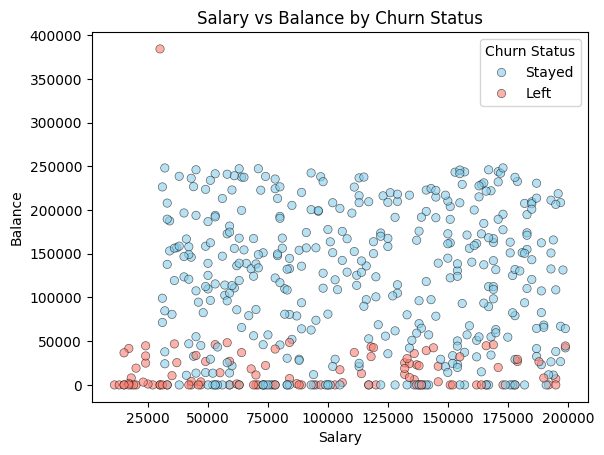

In [60]:
# TODO
# Extract sample data points for visualization using Random Sampling
# Create a scatter plot:
# - Plot salary on the x-axis and balance on the y-axis.
# - Use churn_status as the hue to differentiate churned vs. retained customers.
# - Add transparency (alpha=0.6) to help visualize overlapping points.
# Chart title: Salary vs Balance by Churn Status

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data for visualization
sample_df = df.sample(n=500, random_state=42)

# Create scatter plot
sns.scatterplot(
    data=sample_df,
    x='salary',
    y='balance',
    hue='churn_status',
    alpha=0.6,
    palette={'Stayed': 'skyblue', 'Left': 'salmon'},  # distinct colors
    edgecolor='black'
)

# Add labels and title
plt.title('Salary vs Balance by Churn Status')
plt.xlabel('Salary')
plt.ylabel('Balance')

# Add legend with clear title
plt.legend(title='Churn Status')


plt.show()


Assumption 2:
Customers with more products and lower balances are more likely to churn

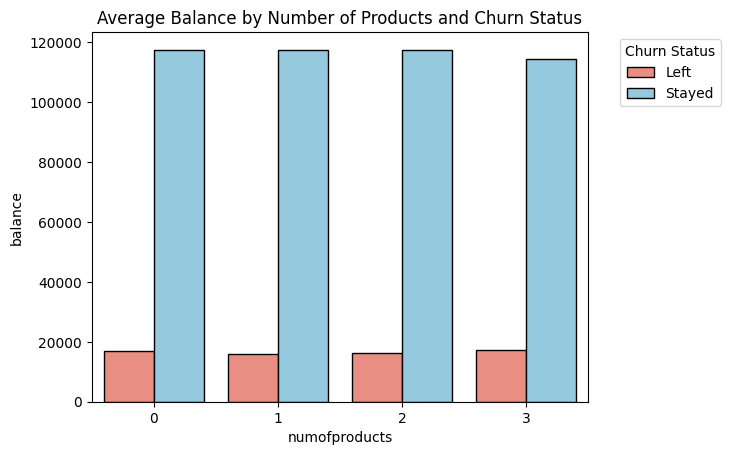

In [61]:
# TODO
# Group data by number of products and churn status:
# Create a bar plot:
# - Plot numofproducts on the x-axis and the average balance on the y-axis.
# - Use churn_status as the hue to compare churned vs. retained customers side by side within each product count group.
# - Chart Title: Average Balance by Number of Products and Churn Status

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Step 1: Group and calculate average balance
avg_balance = (
    df.groupby(['numofproducts', 'churn_status'])['balance']
    .mean()
    .reset_index()
)

# Step 2: Create bar plot
sns.barplot(
    data=avg_balance,
    x='numofproducts',
    y='balance',
    hue='churn_status',
    palette={'Stayed': 'skyblue', 'Left': 'salmon'},
    edgecolor='black'
)

# Step 3: Add labels and title
plt.title('Average Balance by Number of Products and Churn Status')
#plt.xlabel('Number of Products')
#plt.ylabel('Average Balance')
plt.legend(title='Churn Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


## Assumption 3:
Churn rate differs between FD holders and non-holders

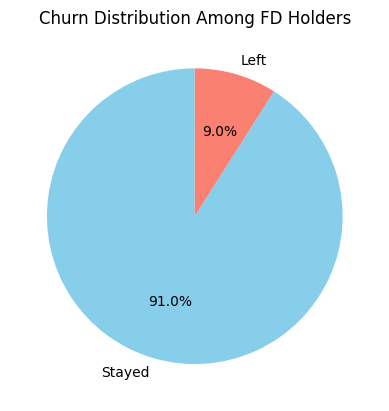

In [62]:
# TODO
# Filter the dataset to include only FD holders
# Use value_counts(normalize=True) on churn_status to get the proportion of churned vs. non-churned customers.
# Round the values for cleaner display.
# Plot the pie chart:
# - Use the churn distribution to create a pie chart.
# - Chart title : Churn Distribution Among FD Holders


import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Filter only FD holders
fd_holders = df[df['hasfd'] == 1]

# Step 2: Get churn distribution (normalized and rounded)
fd_churn_dist = fd_holders['churn_status'].value_counts(normalize=True).round(2)

# Step 3: Plot pie chart

plt.pie(
    fd_churn_dist,
    labels=fd_churn_dist.index,
    autopct='%1.1f%%',
    colors=['skyblue', 'salmon'],
    startangle=90
)

# Step 4: Add title
plt.title('Churn Distribution Among FD Holders')

# Display the chart
plt.show()
